<a href="https://colab.research.google.com/github/Fabriciogg8/AI_ML_Python/blob/main/loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏦 Predicting Loan Default — Securibank Dataset
This notebook explores the Securibank Default dataset and builds several machine learning models
to identify customers likely to default on their loan payments.  
We'll use techniques such as Decision Trees, Naive Bayes, and Support Vector Machines (SVM).

**Main goals:**
1. Understand the dataset.
2. Prepare and encode the features.
3. Train, evaluate, and compare different classification models.
4. Identify key patterns associated with loan default.

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kubicle/AI_ML_with_Python/7_Project_Identify_risk_of_default_with_predictive_analytics/Securibank_Default_Dataset.csv", index_col="Customer ID")

# Display the first 5 rows to understand the structure of the data
df.head()


Mounted at /content/drive


,Gender,Education,Marital status,Age,Repayment_Status_September,Repayment_Status_August,Repayment_Status_July,Repayment_Status_June,Repayment_Status_May,Repayment_Status_April,...,Outstanding_June,Outstanding_May,Outstanding_April,Payment_September,Payment_August,Payment_July,Payment_June,Payment_May,Payment_April,Default_next_month
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,Male,High School,Married,32,0,0,0,0,0,0,...,8437.3,5777.9,1416.3,829.5,600.0,400.0,300.0,100.0,200.0,0
2,Female,High School,Married,49,-1,-1,-2,-1,2,2,...,169.0,113.8,93.0,0.0,0.0,282.8,0.0,18.2,0.0,1
3,Male,University,Married,28,-1,-1,-1,0,-1,-1,...,4597.5,130.0,4398.7,0.0,4625.7,220.0,130.0,4398.7,138.6,0
4,Female,High School,Married,52,2,2,3,3,3,2,...,4074.8,3981.6,4060.7,370.0,160.0,160.0,0.0,160.0,160.0,1
5,Male,Graduate School,Single,34,1,2,0,0,2,0,...,2244.8,1549.0,1734.3,0.0,400.0,200.0,0.0,200.0,200.0,0


### 🗂️ Dataset Overview
Each row represents a customer, with demographic information, past repayment behavior,
and monthly financial data.  
The target variable is **`Default_next_month`**, indicating whether the customer defaulted.


In [ ]:
# Separate target variable (response) from predictors
response = df["Default_next_month"]
predictors = df.drop(columns=["Default_next_month"])

# Convert categorical variables into dummy/indicator variables
predictors = pd.get_dummies(predictors)

# Convert boolean columns to integers (0 and 1)
predictors = predictors.astype(int)

# Quick look at the processed predictors
predictors.head()


,Age,Repayment_Status_September,Repayment_Status_August,Repayment_Status_July,Repayment_Status_June,Repayment_Status_May,Repayment_Status_April,Outstanding_September,Outstanding_August,Outstanding_July,...,Gender_Male,Education_0,Education_Graduate School,Education_High School,Education_Others,Education_University,Marital status_0,Marital status_Married,Marital status_Others,Marital status_Single
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,32,0,0,0,0,0,0,17277,15239,11037,...,1,0,0,1,0,0,0,1,0,0
2,49,-1,-1,-2,-1,2,2,3,-35,-74,...,0,0,0,1,0,0,0,1,0,0
3,28,-1,-1,-1,0,-1,-1,43,0,4625,...,1,0,0,0,0,1,0,1,0,0
4,52,2,2,3,3,3,2,3664,3944,4010,...,0,0,0,1,0,0,0,1,0,0
5,34,1,2,0,0,2,0,2097,1722,2092,...,1,0,1,0,0,0,0,0,0,1


💡 **Note:** Using `pd.get_dummies()` expands categorical columns into one-hot encoded variables,
which is required for most ML algorithms.


In [ ]:
# Split the dataset into training and testing sets
predictor_train, predictor_test, response_train, response_test = train_test_split(
    predictors, response, test_size=0.15, random_state=99
)

# Check structure and data types
predictor_train.info()
predictor_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 2604 to 642
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         2550 non-null   int64
 1   Repayment_Status_September  2550 non-null   int64
 2   Repayment_Status_August     2550 non-null   int64
 3   Repayment_Status_July       2550 non-null   int64
 4   Repayment_Status_June       2550 non-null   int64
 5   Repayment_Status_May        2550 non-null   int64
 6   Repayment_Status_April      2550 non-null   int64
 7   Outstanding_September       2550 non-null   int64
 8   Outstanding_August          2550 non-null   int64
 9   Outstanding_July            2550 non-null   int64
 10  Outstanding_June            2550 non-null   int64
 11  Outstanding_May             2550 non-null   int64
 12  Outstanding_April           2550 non-null   int64
 13  Payment_September           2550 non-null   int64
 14  Payment_Aug

### 🧩 Train/Test Split
We use a **15% test set** to evaluate model performance on unseen data.  
The random seed ensures reproducibility.


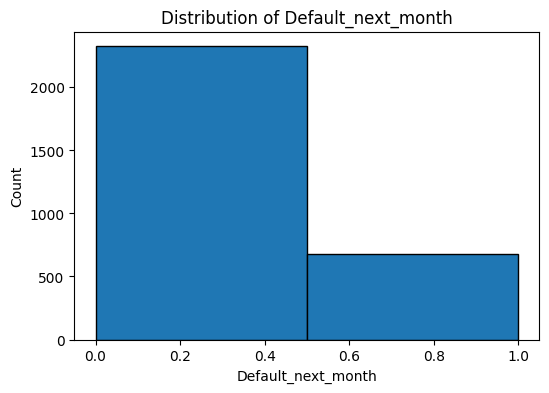

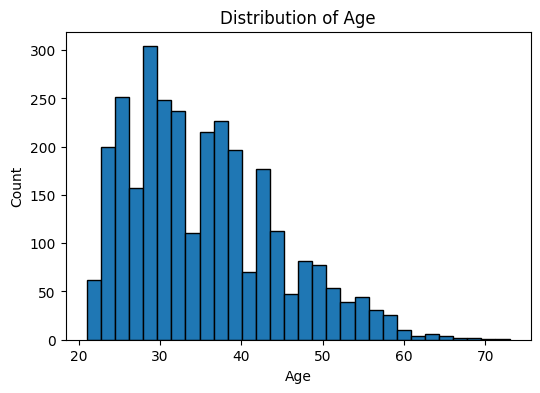

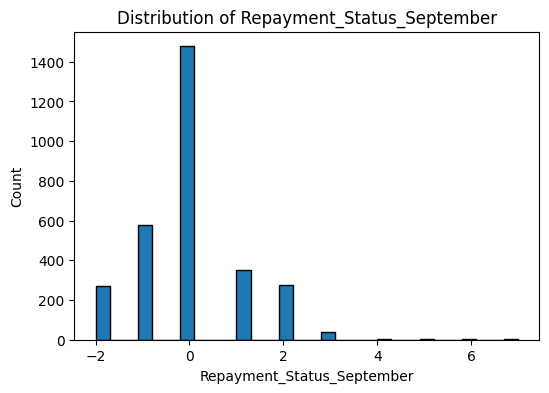

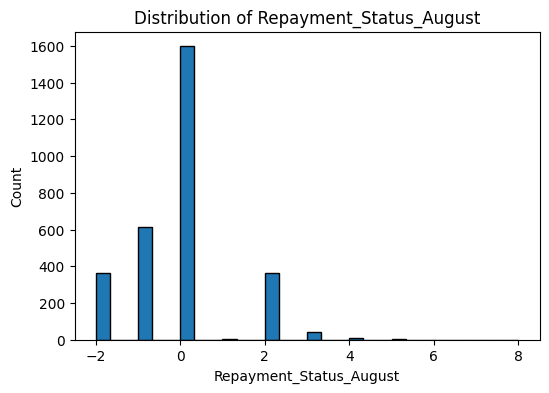

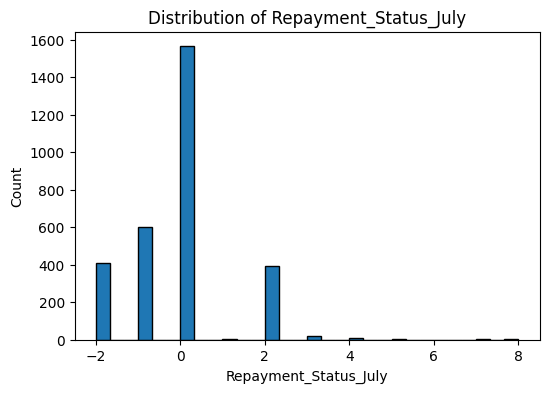

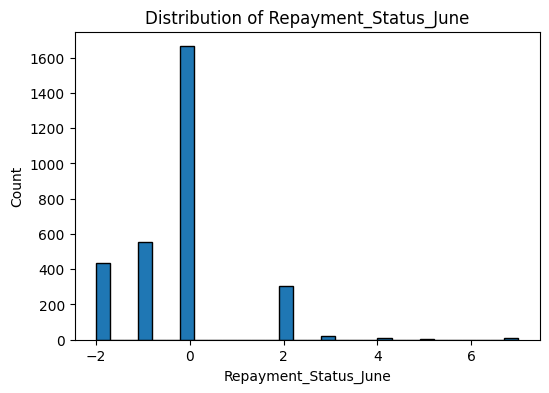

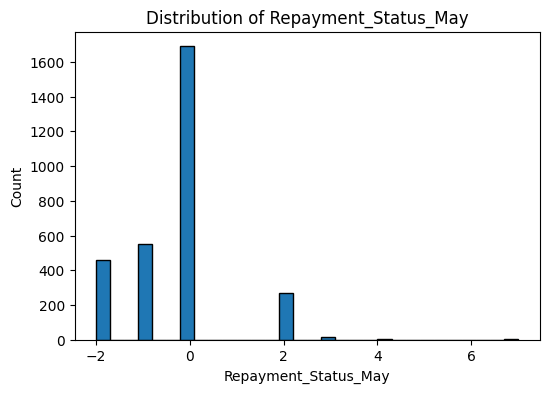

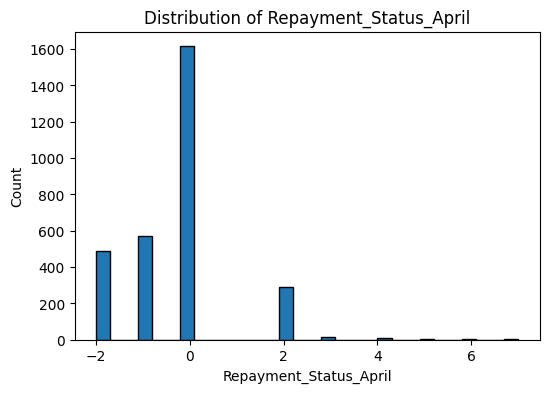

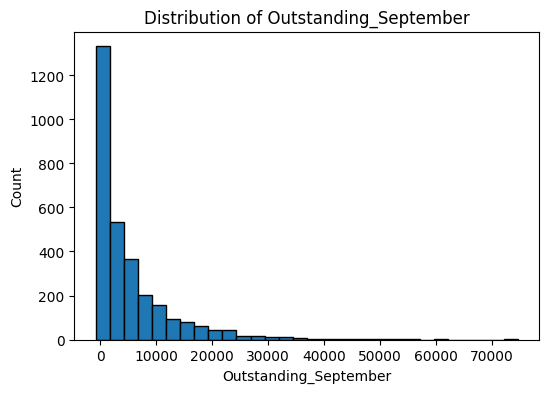

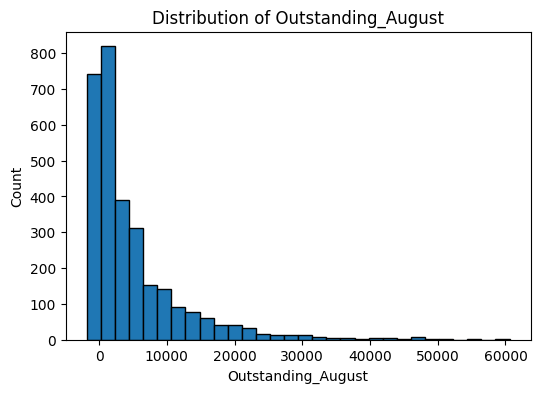

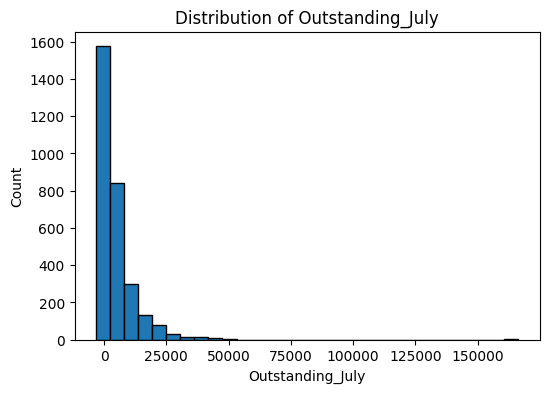

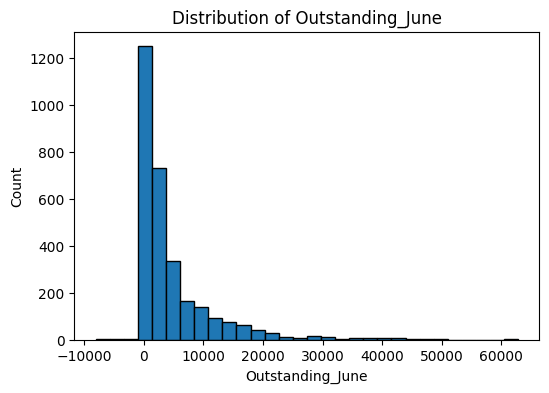

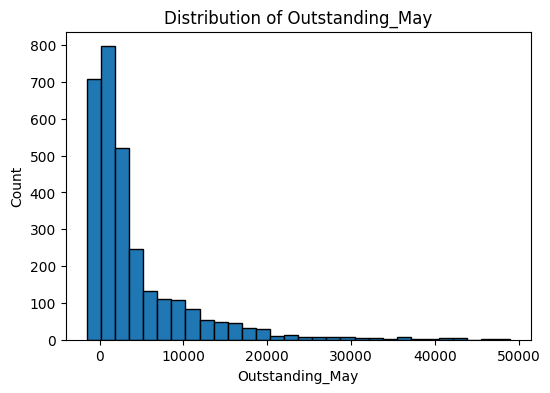

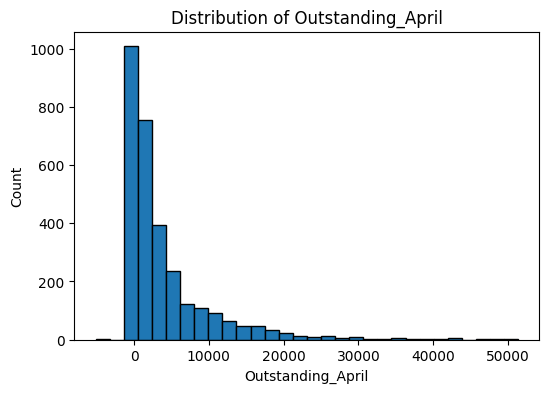

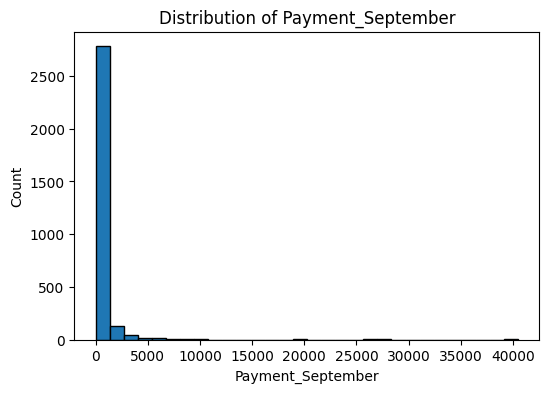

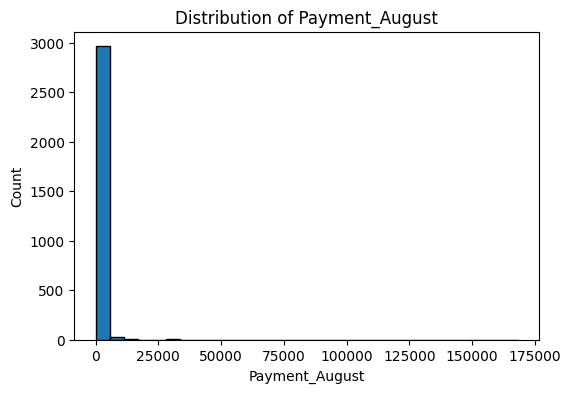

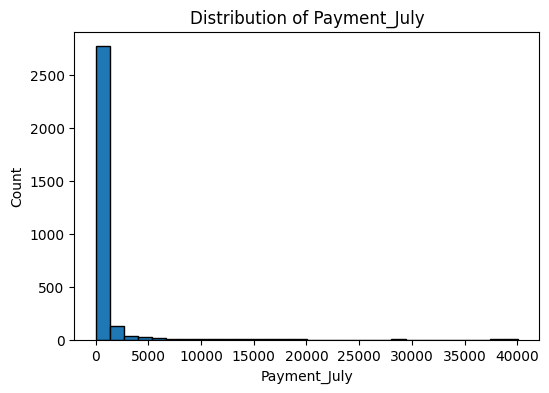

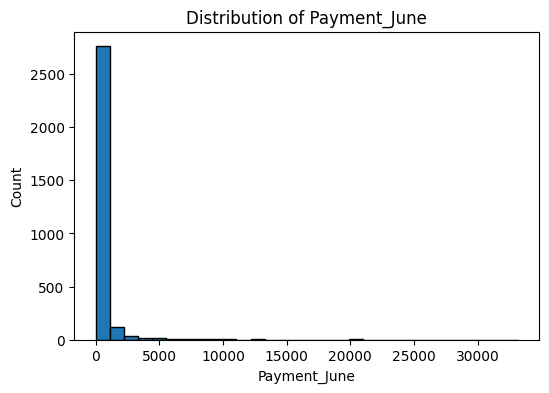

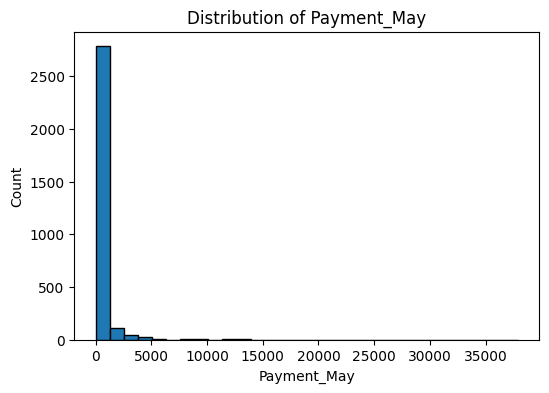

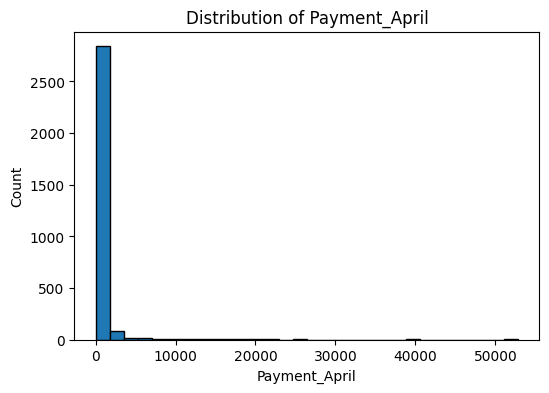

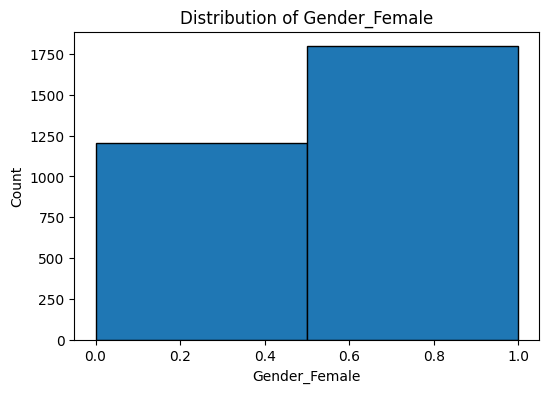

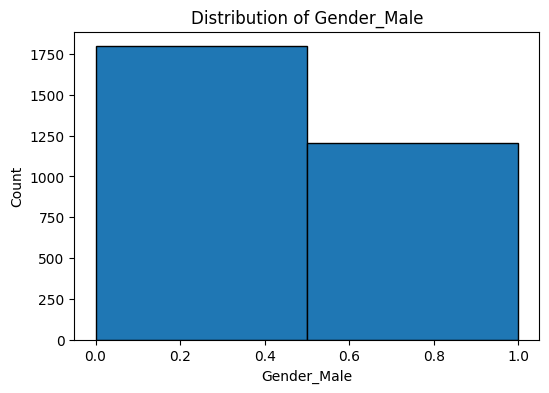

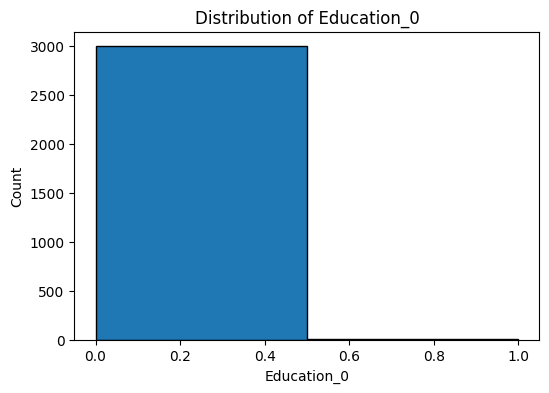

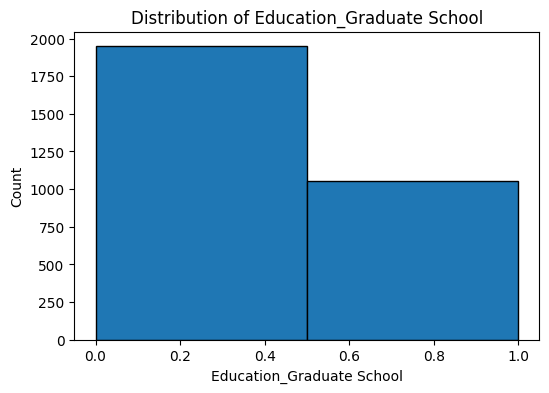

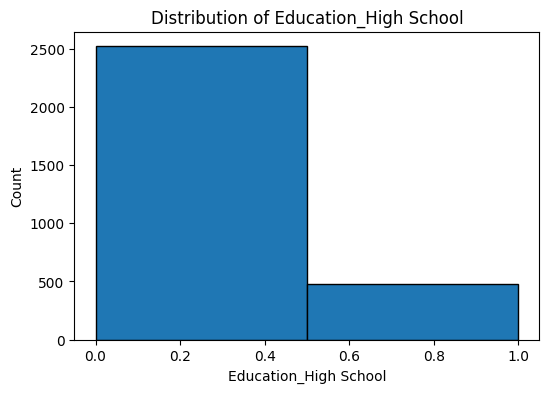

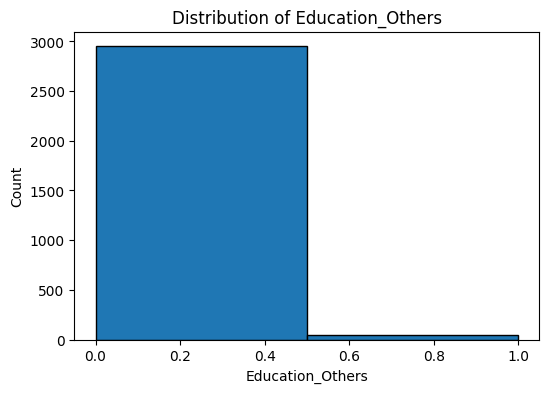

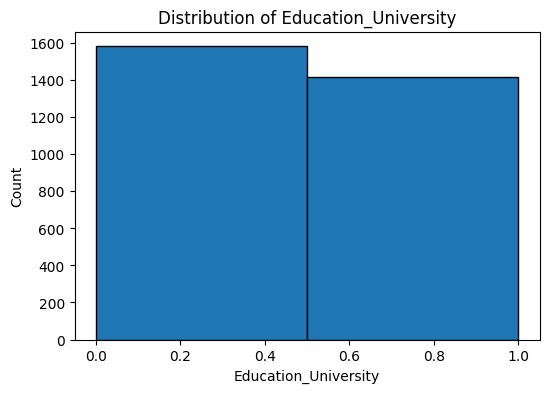

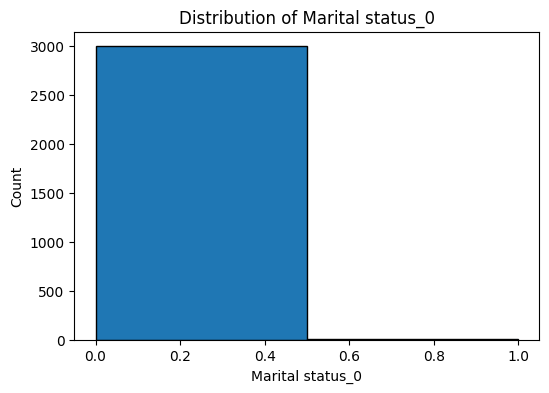

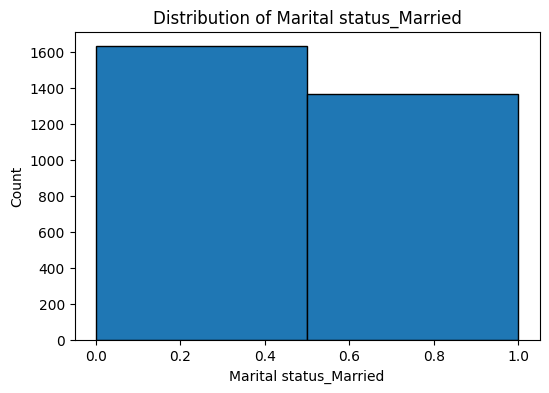

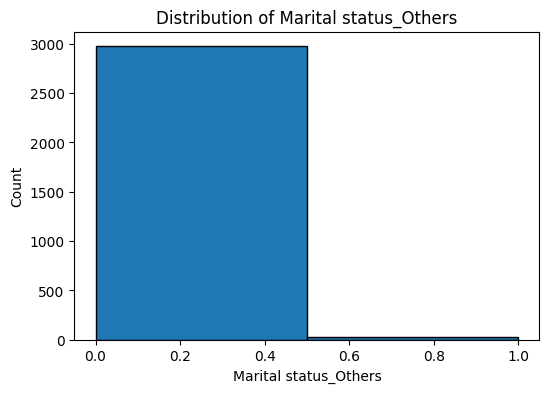

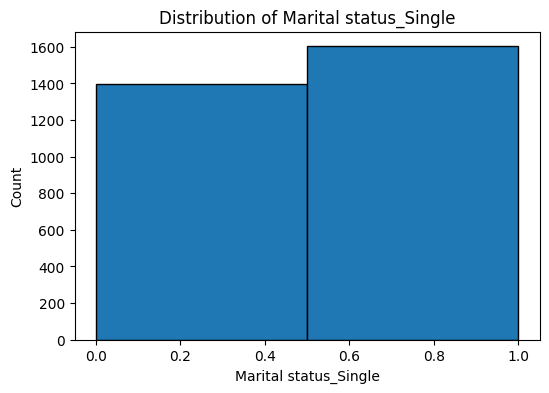

In [ ]:
# Plot distribution of the target variable
plt.figure(figsize=(6,4))
plt.hist(response, bins=2, edgecolor='black')
plt.title("Distribution of Default_next_month")
plt.xlabel("Default_next_month")
plt.ylabel("Count")
plt.show()

# Plot distributions for all predictor variables
for col in predictors.columns:
    plt.figure(figsize=(6,4))
    bins = 2 if set(predictors[col].unique()) <= {0,1} else 30
    plt.hist(predictors[col], bins=bins, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



📊 **Data Exploration:**  
Visualizing each predictor helps identify skewness, outliers, and variable types
(binary vs continuous).


###🔹 Model 1: Decision Tree Classifier

In [ ]:
# Steps
# 1. Train model
# 2. Run model on test data
# 3. Build confusion matrix
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(predictor_train,response_train)

DecisionTreeClassifier()

In [ ]:
#Step 2. Make predictions on the test set
response_predictions = classifier.predict(predictor_test)

In [ ]:
#Step 3. Build confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(response_test, response_predictions)
print("  TN  FP") #True Negatives, False Positives
print(confusion_matrix)
print("  FN  TP") #False Negatives, True Positives

  TN  FP
[[285  64]
 [ 64  37]]
  FN  TP


In [ ]:
# Another way to do it
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Decision Tree model
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(predictor_train, response_train)

# Make predictions on the test set
response_predictions = classifier.predict(predictor_test)

# Evaluate accuracy
accuracy = accuracy_score(response_test, response_predictions)
print(f"📍 Accuracy with max_depth=1: {accuracy:.2f}")

print("\n")

# Detailed classification report
print(classification_report(response_test, response_predictions, target_names=["Pay","Defaulted"]))

📍 Accuracy with max_depth=1: 0.82


              precision    recall  f1-score   support

         Pay       0.84      0.96      0.89       349
   Defaulted       0.72      0.36      0.48       101

    accuracy                           0.82       450
   macro avg       0.78      0.66      0.69       450
weighted avg       0.81      0.82      0.80       450



### 🌳 Decision Tree Model
Using a shallow tree (`max_depth=1`) creates a simple, interpretable model.
However, it may underfit complex relationships between predictors and defaults.


###🔹 Model 2: Gaussian Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# 1. Separate response variables
response = df["Default_next_month"]
predictors = df.drop(columns=["Default_next_month"])

# 2. Apply pd.get_dummies to the entire predictor dataframe
predictors = pd.get_dummies(predictors)

# 3. Optional: convert all to int or float
predictors = predictors.astype(float)

# 4. Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    predictors, response, test_size=0.2, random_state=42
)

# 5. Create the Naive Bayes model
model = GaussianNB()

# 6. Train the model
model.fit(X_train, y_train)

# 7. Predict on test data
y_pred = model.predict(X_test)

# 8. Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44       469
           1       0.26      0.91      0.41       131

    accuracy                           0.42       600
   macro avg       0.59      0.60      0.42       600
weighted avg       0.77      0.42      0.43       600



### 🧮 Gaussian Naive Bayes
Naive Bayes assumes features are conditionally independent.  
Although this assumption rarely holds perfectly, it can still perform surprisingly well on high-dimensional data.


###🔹 Model 3: Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# 4. Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    predictors, response, test_size=0.15, random_state=99
)

# Train Support Vector Classifier
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.87       349
           1       0.00      0.00      0.00       101

    accuracy                           0.78       450
   macro avg       0.39      0.50      0.44       450
weighted avg       0.60      0.78      0.68       450



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ⚙️ Support Vector Machine
SVMs are powerful for binary classification but can struggle with imbalanced data.  
Here, the model predicted almost all samples as non-defaults, leading to **zero precision** for the minority class.
➡️ We could improve this using:
- Class weights (`class_weight='balanced'`)
- Feature scaling
- Kernel tuning (`kernel='rbf'`, `C` and `gamma` parameters)


### 📊Summary and Business Recommendations
### 🧭 Model Comparison Summary
| Model                            | Accuracy | Strengths                            | Weaknesses                                  |
| :------------------------------- | :------- | :----------------------------------- | :------------------------------------------ |
| **Decision Tree (max_depth=1)**  | ~82%     | Simple, interpretable, fast to train | Underfits complex relationships             |
| **Gaussian Naive Bayes**         | ~42%     | Fast, handles high-dimensional data  | Poor accuracy, oversimplifies relationships |
| **Support Vector Machine (SVM)** | ~78%     | Good at separating classes in theory | Failed to detect defaults due to imbalance  |


📊 Key Findings

The Decision Tree model achieved the highest overall accuracy (82%), making it the most reliable baseline classifier in this dataset.

However, it shows asymmetry in performance: it correctly identifies customers who pay on time, but struggles to capture true defaulters (recall for “Defaulted” = 0.36).

Naive Bayes had the opposite issue: high recall for defaulters but low precision overall, leading to many false positives.

The SVM almost ignored the minority class, predicting almost all customers as “non-default.”
This suggests that class imbalance is a critical challenge in this dataset.

💡 Interpretation and Insights

Customer repayment history (repayment status and outstanding balances) are likely the strongest predictors of default.

The dataset is imbalanced, meaning defaults are much rarer than non-defaults — a common real-world banking scenario.

As a result, models that optimize for accuracy can look good on paper but fail to detect high-risk clients, which is unacceptable in credit risk analysis.